In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# create custom color palette with 2 colors 1. green 2. red
colors = ["#2ecc71", "#e74c3c"]


/var/folders/b7/6br289316wg6bytn4ncwqq1r0000gn/T/ipykernel_76509/1730715681.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# csv = pd.read_csv("virus_data.csv")

In [3]:
# from google.colab import files
# print("Please load the raw csv data")
# print(os.getcwd())
# #csv = pd.read_csv("C:\Users\saarg\OneDrive\מסמכים\Intro_To_ML\Wet_1\virus_data.csv")
# uploadedData = files.upload()
# filename = list(uploadedData)[0]

In [4]:
dataset = pd.read_csv("virus_data.csv")
dataset

,patient_id,age,sex,weight,blood_type,current_location,num_of_siblings,happiness_score,household_income,conversations_per_day,...,PCR_03,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,spread,risk
0,1903,32,F,70.8,O+,"('19.04222', '-98.11889')",3,9,1,6,...,1.041181,-1.105253,108.517714,6.175927,6.095500,3.901404,7.298945,-13.627960,1,-1
1,1166,47,M,74.3,A+,"('51.62907', '-0.74934')",2,10,2,13,...,96.121688,-2.438268,314.041672,25.188875,4.964383,4.544491,5.086298,1.891701,-1,1
2,1963,36,M,91.5,O+,"('39.12074', '27.18052')",4,11,4,6,...,5.531260,-5.282569,175.215865,5.462792,4.961834,3.340734,1.713049,-11.613582,-1,1
3,856,38,M,74.4,O+,"('40.1675', '34.37389')",1,8,2,15,...,-9.795680,-5.032215,292.933617,7.024178,2.951563,1.775654,0.675661,-5.757544,-1,-1
4,1808,23,F,59.7,A+,"('48.25', '16.4')",1,10,2,3,...,35.588668,-9.548718,36.885983,22.601152,5.961358,5.664607,-4.736603,-4.422387,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,588,9,M,27.7,O+,"('4.2475', '9.00472')",3,10,2,5,...,-1.048154,-6.617420,313.097035,-1.209834,1.169673,7.727177,-3.091915,-13.761051,1,-1
1246,1494,56,M,74.2,O+,"('47.80527', '-122.24064')",3,10,1,8,...,-50.609338,-5.686104,195.605069,23.630261,2.607271,8.002931,0.817510,-2.864392,-1,1
1247,1824,30,M,78.6,O+,"('37.73604', '-120.93549')",2,10,3,2,...,52.450222,-11.461866,32.951754,5.531199,3.333986,0.737609,-7.977065,-6.143124,-1,-1
1248,493,33,M,75.8,A+,"('55.67938', '12.53463')",1,9,5,6,...,-80.312601,-5.655681,80.255655,-8.228677,3.092422,6.273519,0.057740,-6.293705,-1,-1


In [5]:
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def trasform_datas_to_numeric(dataset):
    new_data = dataset.copy()
    new_data["SpecialProperty"] = new_data["blood_type"].isin(["O+","B+"])
    new_data = new_data.drop(columns=['blood_type'])
    new_data["male"] = new_data["sex"].isin(["M"])
    new_data["sore_throat"] = new_data["symptoms"].str.contains("sore_throat")
    new_data["sore_throat"] = new_data["sore_throat"].replace(np.NaN, False)
    new_data["cough"] = new_data["symptoms"].str.contains("cough")
    new_data["cough"] = new_data["cough"].replace(np.NaN, False)
    new_data["shortness_of_breath"] = new_data["symptoms"].str.contains("shortness_of_breath")
    new_data["shortness_of_breath"] = new_data["shortness_of_breath"].replace(np.NaN, False)
    new_data["fever"] = new_data["symptoms"].str.contains("fever")
    new_data["fever"] = new_data["fever"].replace(np.NaN, False)
    new_data["smell_loss"] = new_data["symptoms"].str.contains("smell_loss")
    new_data["smell_loss"] = new_data["smell_loss"].replace(np.NaN, False)
    new_data["has_any_symptoms"] = new_data["sore_throat"] | new_data["cough"] | new_data["shortness_of_breath"] | new_data["smell_loss"] | new_data["fever"]
    new_data["has_nose_ear_throat_symptoms"] = new_data["sore_throat"] | new_data["cough"] | new_data["shortness_of_breath"] | new_data["smell_loss"]
    new_data["lungs_symptoms"] = new_data["cough"] | new_data["sore_throat"]
    new_data = new_data.drop("symptoms", axis = "columns")
    new_data = new_data.drop("sex", axis = "columns")
    # change all boolean columns to int
    new_data["SpecialProperty"] = new_data["SpecialProperty"].astype(int)
    new_data["sore_throat"] = new_data["sore_throat"].astype(int)
    new_data["cough"] = new_data["cough"].astype(int)
    new_data["shortness_of_breath"] = new_data["shortness_of_breath"].astype(int)
    new_data["fever"] = new_data["fever"].astype(int)
    new_data["smell_loss"] = new_data["smell_loss"].astype(int)
    new_data["has_any_symptoms"] = new_data["has_any_symptoms"].astype(int)
    new_data["has_nose_ear_throat_symptoms"] = new_data["has_nose_ear_throat_symptoms"].astype(int)
    new_data["lungs_symptoms"] = new_data["lungs_symptoms"].astype(int)
    new_data["male"] = new_data["male"].astype(int)
    new_data["current_location"] = new_data["current_location"].str.replace("(","")
    new_data["current_location"] = new_data["current_location"].str.replace(")","")
    new_data["current_location"] = new_data["current_location"].str.replace("'","")
    new_data["current_location"] = new_data["current_location"].str.replace(" ","")
    new_data["current_location"] = new_data["current_location"].str.split(",")
    new_data["x"] = new_data["current_location"].str.get(0)
    new_data["y"] = new_data["current_location"].str.get(1)
    new_data = new_data.drop("current_location", axis = "columns")
    new_data["x"] = new_data["x"].astype(float)
    new_data["y"] = new_data["y"].astype(float)
    new_data["pcr_date"] = pd.to_datetime(new_data["pcr_date"], format='%d-%m-%y')
    new_data["pcr_day"] = new_data["pcr_date"].dt.day
    new_data["pcr_month"] = new_data["pcr_date"].dt.month
    new_data["pcr_year"] = new_data["pcr_date"].dt.year
    new_data = new_data.drop("pcr_date", axis = "columns")
    new_data["x"]= pd.to_numeric(new_data["x"], errors='coerce')
    new_data["y"] = pd.to_numeric(new_data["y"], errors='coerce')

    return new_data

#param training_data - the training data to transform and normalize (should not be changed)
#param new_data - the new data after training_data was transformed and normalized
def prepare_data(training_data, new_data):
    # do all the things we did before to training_data and insert the new data to the model
    new_data_to_change = new_data.copy()
    new_data_to_change = trasform_datas_to_numeric(new_data_to_change)
    training_data_to_change = training_data.copy()
    training_data_to_change = trasform_datas_to_numeric(training_data_to_change)
    # go through all the columns and use shapiro to check if the column is normally distributed as min-max or standard and normalize the data
    for column in training_data_to_change.columns:
        if column not in ['spread', 'risk']:
            statistics, p_value = shapiro(training_data_to_change[[column]])
            if p_value < 0.05:
                num_of_unique = training_data_to_change[column].nunique()
                if num_of_unique < 30 and num_of_unique > 2:
                    new_data_to_change[column] = StandardScaler().fit(training_data_to_change[[column]]).transform(new_data_to_change[[column]])
                else:
                    new_data_to_change[column] = MinMaxScaler((-1, 1)).fit(training_data_to_change[[column]]).transform(new_data_to_change[[column]])
            else:
                new_data_to_change[column] = StandardScaler().fit(training_data_to_change[[column]]).transform(new_data_to_change[[column]])
    return new_data_to_change



In [6]:
from sklearn.model_selection import train_test_split
# Set the option to opt-in to the future behavior
pd.set_option('future.no_silent_downcasting', True)

dataset = pd.read_csv("virus_data.csv")
full_train_set, full_test_set = train_test_split(dataset, random_state=89, test_size=0.2)
prepared_train_data = prepare_data(full_train_set, full_train_set)
prepared_train_data.to_csv("prepared_train_data.csv", index=False)
prepared_test_data = prepare_data(full_train_set, full_test_set)
prepared_test_data.to_csv("prepared_test_data.csv", index=False)

In [7]:
prepared_train_data

,patient_id,age,weight,num_of_siblings,happiness_score,household_income,conversations_per_day,sugar_levels,sport_activity,PCR_01,...,fever,smell_loss,has_any_symptoms,has_nose_ear_throat_symptoms,lungs_symptoms,x,y,pcr_day,pcr_month,pcr_year
1238,0.971986,-0.287671,0.195837,2.646083,0.649743,1.590597,-0.194676,-0.318830,-0.216527,-0.061447,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.774913,-0.935505,-0.733333,-1.246977,1.0
466,-0.756878,-0.561644,-0.209082,-0.549669,-0.726832,0.035001,-0.541691,-0.880941,1.501940,-0.325936,...,-1.0,1.0,1.0,1.0,-1.0,0.153142,0.302922,0.600000,-1.246977,1.0
861,0.738869,-0.780822,-0.434248,0.249269,1.338031,0.035001,-0.888707,-0.318830,0.642707,0.135581,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.779744,-0.189719,-0.733333,1.346089,-1.0
11,0.898949,-0.342466,0.330180,0.249269,0.649743,0.035001,-0.194676,-0.262618,0.642707,-0.437746,...,-1.0,-1.0,1.0,1.0,-1.0,0.817635,0.384928,-0.333333,-0.094503,-1.0
755,-0.636818,-0.890411,-0.699149,0.249269,-1.415119,-0.742797,-0.541691,-1.443053,-0.216527,-0.662355,...,-1.0,-1.0,1.0,1.0,1.0,0.053271,-0.121841,-0.133333,0.193616,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,-0.143572,-0.589041,0.067171,1.048207,-0.726832,-0.742797,1.193387,0.861604,-1.075760,0.030445,...,-1.0,-1.0,1.0,1.0,1.0,0.725520,-0.189847,0.333333,-0.958858,1.0
534,0.178589,-0.205479,0.099338,1.048207,-1.415119,0.035001,-0.194676,-0.206407,0.642707,0.391055,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.616152,-0.054975,0.933333,0.481734,-1.0
877,-0.484742,-0.616438,-0.521287,-0.549669,-2.103407,-0.742797,0.152340,-2.286220,1.501940,0.392717,...,-1.0,-1.0,1.0,1.0,1.0,0.684508,-0.101832,0.866667,0.481734,-1.0
132,0.615808,-0.095890,0.666982,-0.549669,0.649743,-0.742797,-0.541691,0.524338,0.642707,-0.073059,...,-1.0,-1.0,1.0,1.0,1.0,-0.039909,0.636784,0.400000,0.193616,-1.0


In [8]:
temp_df = prepared_train_data[["PCR_01","PCR_03"]]

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)
X_train = prepared_train_data.drop(["spread","risk"], axis = 'columns')
X_test = prepared_test_data.drop(["spread","risk"], axis = 'columns')
y_train = prepared_train_data[["spread",'risk']]
y_test = prepared_test_data[["spread",'risk']]

temporary_X_train = X_train[['PCR_01','PCR_03']]
temporary_y_train = y_train['spread']
temporary_X_test = X_test[['PCR_01','PCR_03']]
temporary_y_test = y_test['spread']
knn_model.fit(temporary_X_train, temporary_y_train)
temporary_y_test_predicted = knn_model.predict(temporary_X_test)

In [10]:
def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


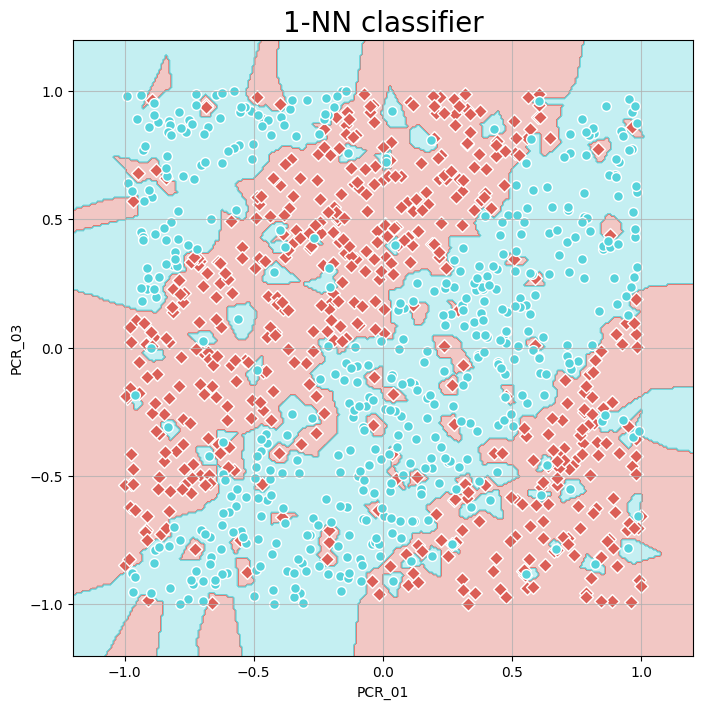

In [11]:

visualize_clf(knn_model,temporary_X_train,temporary_y_train,"1-NN classifier","PCR_01","PCR_03")


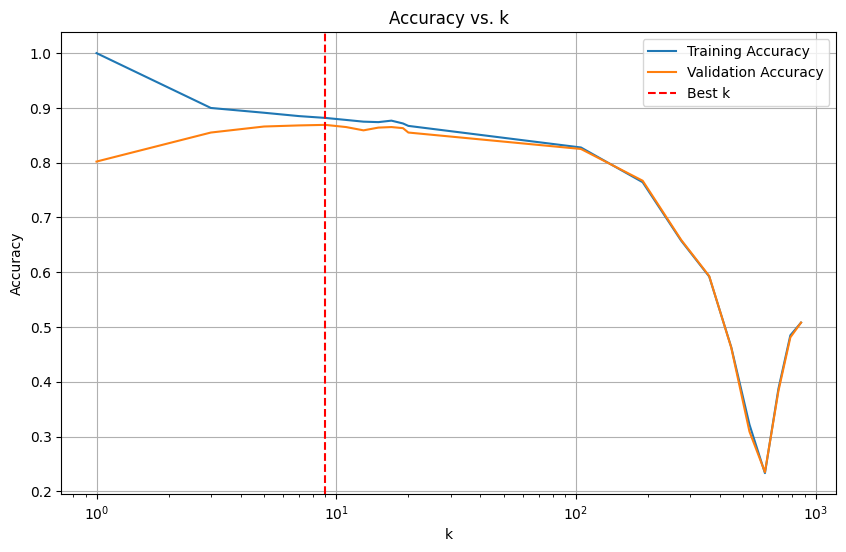

The best k value is 9
Mean train score:  1.0
mean Validation score:  0.869
The k values that cause overfitting are the ones that are too low, because they are too sensitive to noise and outliers. The k values that cause underfitting are the ones that are too high, because they are too general and do not capture the complexity of the data.


In [12]:
from sklearn.model_selection import cross_validate

# Define the range of k values
k_values = list(range(1, 20, 2)) + list(range(20, 871, 85))

# Create an empty dictionary to store the results
results = {}
train_scores = []
validation_scores = []
# Iterate over each k value
for k in k_values:
    # Create a KNeighborsClassifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform cross-validation and get the accuracy scores
    scores = cross_validate(knn, X_train[['PCR_01', 'PCR_03']], y_train['spread'], cv=8, scoring='accuracy', return_train_score=True)
    train_scores.append(scores['train_score'].mean())
    validation_scores.append(scores['test_score'].mean())
    # Store the average accuracy score in the results dictionary
    results[k] = scores['test_score'].mean()

# Find the best k value with the highest accuracy score
best_k = max(results, key=results.get)

#  Make the x-axis
#logarithmic (using plt.semilogx) and attach the plot (with the 2 curves) to your report.
plt.figure(figsize=(10, 6))
plt.semilogx(k_values, train_scores, label='Training Accuracy')
plt.semilogx(k_values, validation_scores, label='Validation Accuracy')
# plt.plot(k_values, list(results.values()), label='Accuracy', marker='o')
plt.axvline(best_k, color='r', linestyle='--', label='Best k')
plt.title('Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# print Which 𝑘 is the best? 
print(f"The best k value is {best_k}")
# print What are its average training and validation accuracies (estimated by cross-val.)? 
print('Mean train score: ', train_scores[np.argmax(train_scores)])
print('mean Validation score: ', validation_scores[np.argmax(validation_scores)])

# print Which 𝑘 values cause overfitting and underfitting and why?
print('The k values that cause overfitting are the ones that are too low, because they are too sensitive to noise and outliers. The k values that cause underfitting are the ones that are too high, because they are too general and do not capture the complexity of the data.')



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


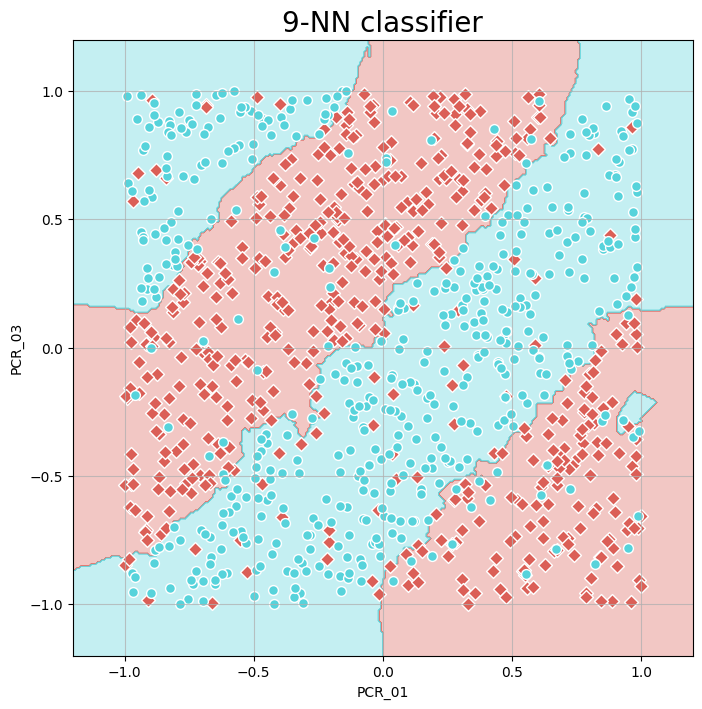

Test accuracy:  0.8


In [13]:
knn_model = KNeighborsClassifier(n_neighbors=9)
X_train = prepared_train_data.drop(["spread","risk"], axis = 'columns')
X_test = prepared_test_data.drop(["spread","risk"], axis = 'columns')
y_train = prepared_train_data[["spread",'risk']]
y_test = prepared_test_data[["spread",'risk']]

temporary_X_train = X_train[['PCR_01','PCR_03']]
temporary_y_train = y_train['spread']
temporary_X_test = X_test[['PCR_01','PCR_03']]
temporary_y_test = y_test['spread']
knn_model.fit(temporary_X_train, temporary_y_train)
temporary_y_test_predicted = knn_model.predict(temporary_X_test)

#  plot the decision regions of this final model (using the visualize_clf function)
visualize_clf(knn_model,temporary_X_train,temporary_y_train,"9-NN classifier","PCR_01","PCR_03")

# print the test accuracy of the final model
from sklearn.metrics import accuracy_score
print('Test accuracy: ', accuracy_score(temporary_y_test, temporary_y_test_predicted))


In [14]:
# import ID3 from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

decision_tree = DecisionTreeClassifier(max_depth=3, criterion='entropy')
decision_tree.fit(X_train, y_train['risk'])
decision_tree_score = decision_tree.score(X_train, y_train['risk'])

decision_tree_score

0.696

Text(0.5, 1.0, 'Decision Tree - ID3 with max_depth of 3')

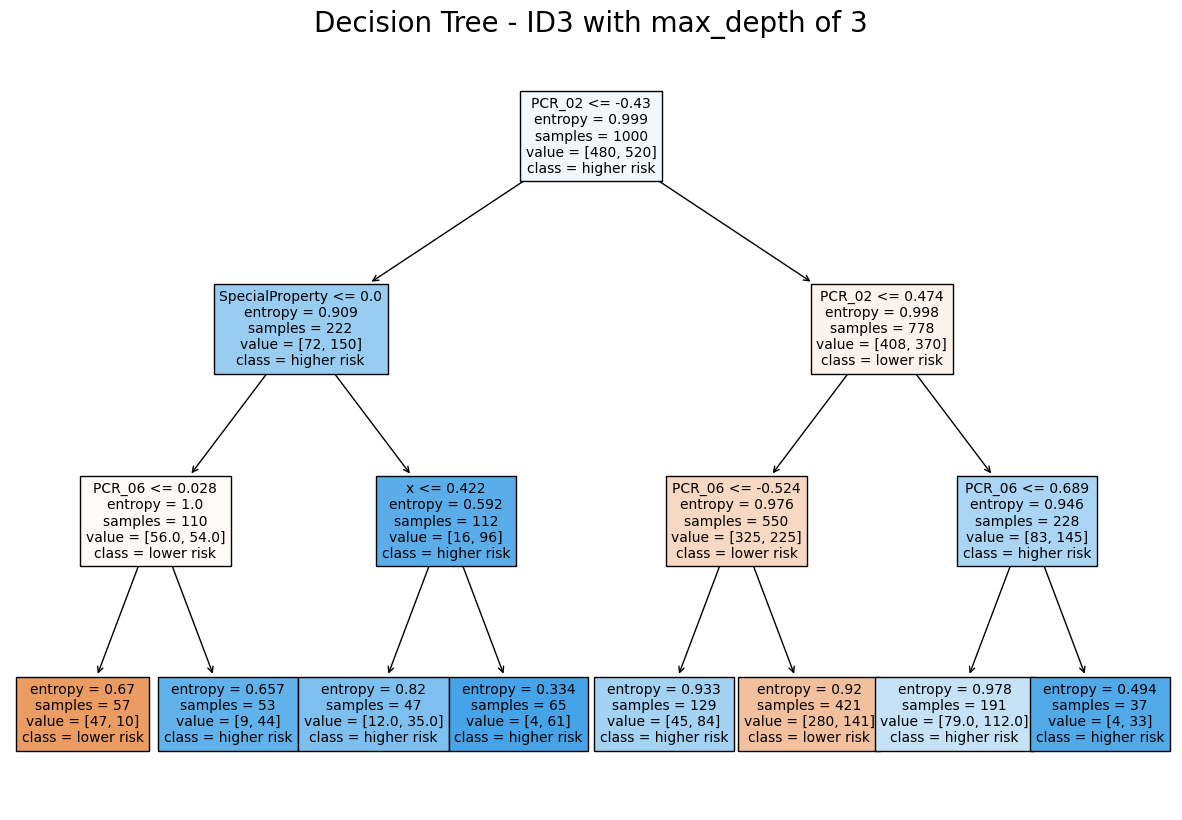

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(decision_tree,fontsize=10, ax=ax,feature_names=X_train.columns, 
          class_names=['lower risk', 'higher risk'],filled=True)
plt.title('Decision Tree - ID3 with max_depth of 3', fontsize=20)

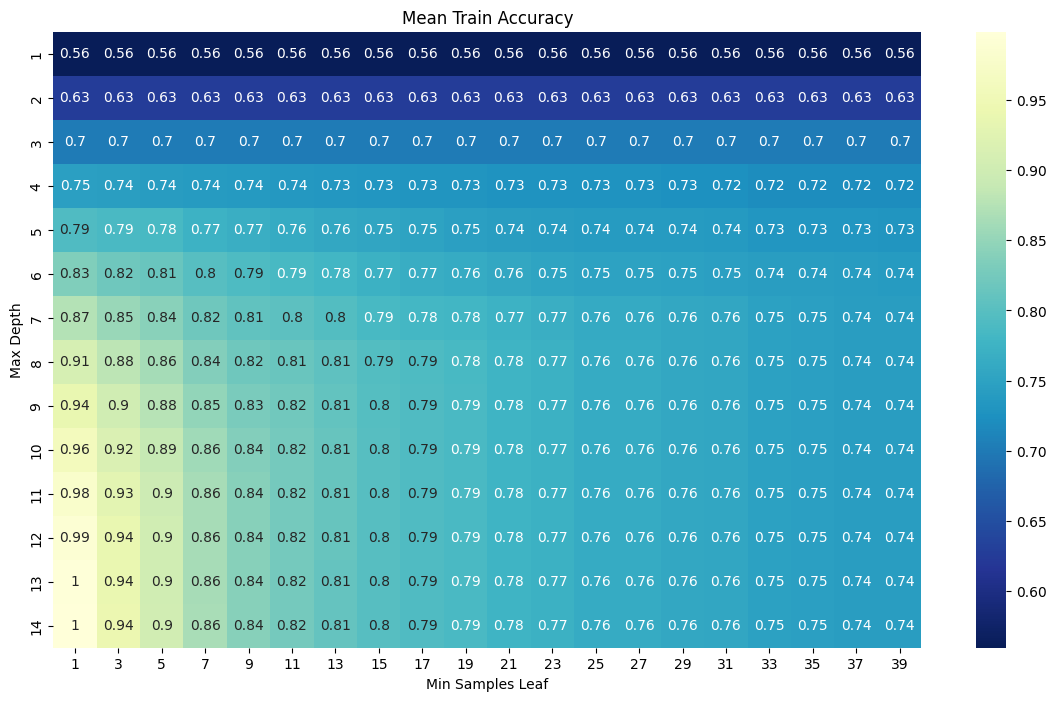

In [18]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(DecisionTreeClassifier(), 
                    param_grid={
    'min_samples_leaf': list(range(1, 50, 3)),
    'max_depth': list(range(1, 15))
}, cv=5, return_train_score=True)
grid.fit(X_train, y_train['risk'])

scores = pd.DataFrame(grid.cv_results_).pivot(index='param_max_depth', columns='param_min_samples_leaf', values='mean_train_score')

plt.figure(figsize=(14, 8))
sns.heatmap(scores, annot=True, cmap='YlGnBu_r')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Max Depth')
plt.title('Mean Train Accuracy')
plt.show()

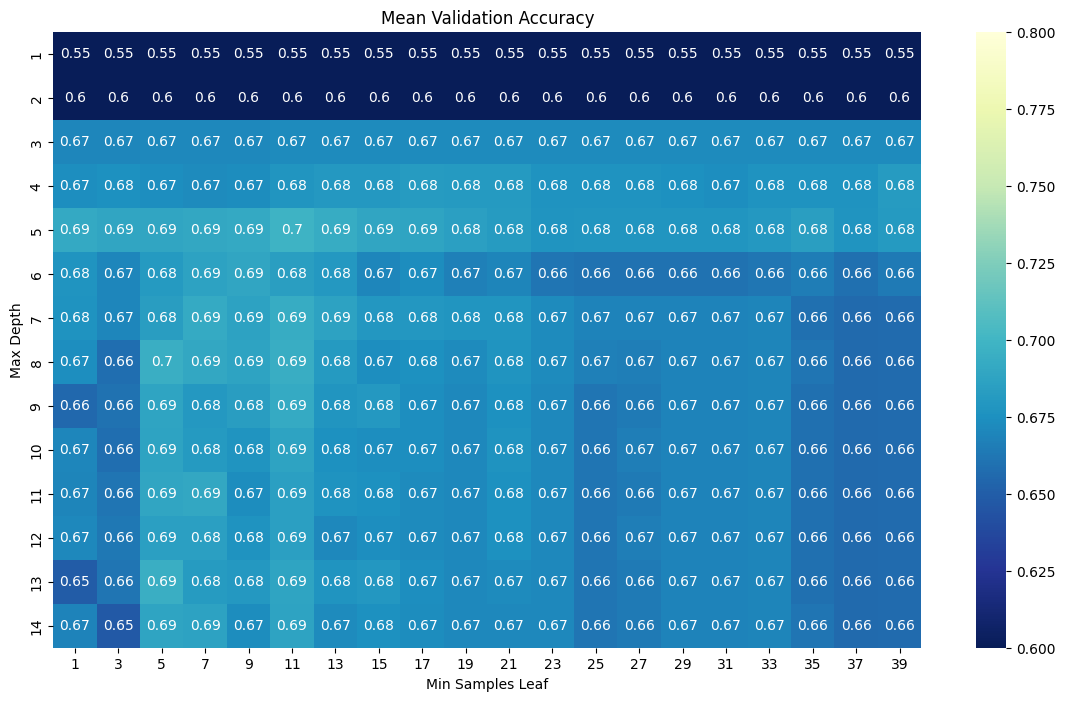

In [19]:
plt.figure(figsize=(14, 8))
sns.heatmap(pd.DataFrame(grid.cv_results_).pivot(index='param_max_depth', columns='param_min_samples_leaf', values='mean_test_score'), annot=True, cmap='YlGnBu_r', vmin=0.6, vmax=0.8)
plt.xlabel('Min Samples Leaf')
plt.ylabel('Max Depth')
plt.title('Mean Validation Accuracy')
plt.show()